# **Regresion lineal** 
La regresión lineal es el campo de estudia la relación estadística entre dos variables, y cuando hay mas de una variable independiente se llama regresion lineal múltiple. La variable independiente se denota como **x**, mientras que la variable dependiente se denota como **y**. El modelo de regresion lineal es $y_i=\beta_0+\beta_1x_i+e_i$.


Los inicios de la regresión datan de cuando 1805 Legendre publicó el método de los mínimos cuadrados, que fue la primera forma de regresión lineal, la cual fue desarrollada mas profundamente mas tarde por Gauss.

El término *regresión* se utilizó por primera vez en el estudio para comparar la estatura de padres e hijos, donde se concluyó que los hijos cuyos padres que tenían una estatura muy superior al valor medio, tendían a igualarse a este, mientras que aquellos cuyos padres eran muy bajos tendían a reducir su diferencia respecto a la media, es decir, *regresaban* al promedio.

Las hipótesis que debe cumplir el modelo son:


1.   $E(e_i)=0$
2.   $Var(e_i)=\sigma^2 < \infty $
3.   $Cov(e_i, e_j)=0$   $ \forall$ $ i\neq j$
4.   $e \sim N(0, \sigma^2)$
5.   $Cov(x_{i}, x_{i'})=0$   $ \forall$ $ i\neq i'$
6.   $Cov(x_i, e_i)=0$   $ \forall$ $ i$


En la vida real no se conocen los parámetros del modelo $\beta_0$ y $\beta_1$ por lo que se recurre a hacer una estimación del modelo de la siguiente manera: 
$\hat{y_i}=\hat{\beta_0}+\hat{\beta_1}x_i$ donde $\hat{\beta_0}$ y $\hat{\beta_1}$ estan dados por:

$\hat{\beta_0}= \bar{y}-\hat{\beta_1}\bar{x}$

$\hat{\beta_1}=\frac{\sum_{i=1}^n x_iy_i - n\bar{x}\bar{y}}{\sum_{i=1}^n x_i^2-\frac{1}{n} \left( \sum_{i=1}^n x_i \right) ^2}   $

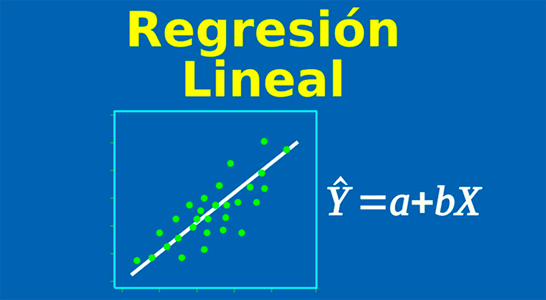
Para el caso de regresion lineal multiple el modelo a estimar es:

$Y=X^t \beta + E$ 

donde Y es un vector de n observaciones, $\beta$ es un vector de tamaño m+1, donde m son la cantidad de variables independientes, y X es una matriz de tamaño m+1*n, cuya primera columna es de 1's y en este caso es para hayar la estimación del intercepto. El modelo estimado es:

$\hat{Y}=X^t \hat{\beta}$ 

Con:

$\hat{\beta}= \left( X^tX \right)^{-1}X^tY $ 




Por ejemplo, el archivo adevrtising = tiene las ventas de 200 empresas en miles de dolares que invirtieron en 2 tipos de publicidad: tv y radio, se desea saber la relación entre las ventas y la cantidad de dinero invertida en los 2 tipos de publicidad




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
data=pd.read_excel("/Advertising.xlsx")
data.shape

(200, 3)

In [ ]:
data.head()

,TV,radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9


In [ ]:
data.describe()

,TV,radio,sales
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,14.022500
std,85.854236,14.846809,5.217457
min,0.700000,0.000000,1.600000
25%,74.375000,9.975000,10.375000
50%,149.750000,22.900000,12.900000
75%,218.825000,36.525000,17.400000
max,296.400000,49.600000,27.000000


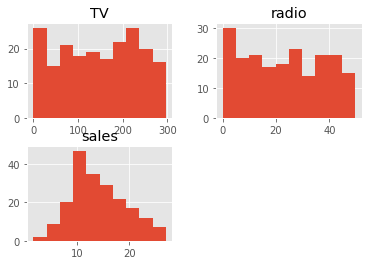

In [ ]:
data.hist()
plt.show()

In [ ]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =data[["TV","radio"]]
X_train = np.array(dataX)
y_train =data['sales'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.04575482 0.18799423]
Independent term: 
 2.921099912405138
Mean squared error: 2.78
Variance score: 0.90


Por lo que se puede ver que el modelo lineal es:

$\hat{y_i}=2.92+0.045X_1+0.188x_2$

donde $x_1$ es la inversion en publicidad de TV y $X_2$ es la inversion en las ventas de radio. La gráfica de esta regresion está dada por:



Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

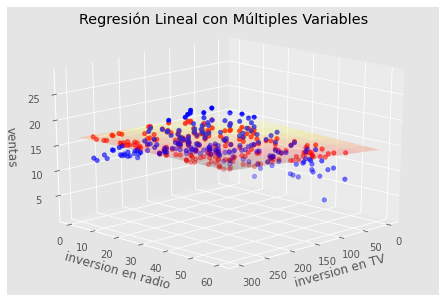

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
 
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 300, num=10), np.linspace(0, 60, num=10))
 
# calculamos los valores del plano para los puntos x e y
nuevoX = (regr.coef_[0]*xx)
nuevoY = (regr.coef_[1]*yy) 
 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr.intercept_)
 
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
 
# Graficamos en azul los puntos en 3D
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='blue')
 
# Graficamos en rojo, los puntos que 
ax.scatter(X_train[:, 0], X_train[:, 1], y_pred, c='red')
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=20., azim=45)
        
ax.set_xlabel('inversion en TV')
ax.set_ylabel('inversion en radio')
ax.set_zlabel('ventas')
ax.set_title('Regresión Lineal con Múltiples Variables')

En conclusión, la regresión lineal es muy util cuando se tiene normalidad de los errores, ya que si este supuesto se incumple, entonces se pueden hacer inferencias erradas.

Reverencias [wiki](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal)
